In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import time
import networkx as nx
from src.environment import EnvironmentNetwork
from src.runner import Runner
import random
import json

In [2]:
style.use('seaborn-white')

# Initialize parameters to calculate R0 and analyse the distribution of R0s

In [3]:
age_groups = ['age_0_10', 'age_10_20', 'age_20_30', 'age_30_40', 'age_40_50', 
              'age_50_60', 'age_60_70', 'age_70_80', 'age_80_plus']

In [4]:
parameters = {
    # general simulation parameters
    "time": 90,
    "number_of_agents": 250,
    "monte_carlo_runs": 5,
    "high_performance": False,
    # specific simulation parameters
    "share_inital_agents_infected": 0.01, # percentage of agents infected randomly at the start of the simulation
    "highest_density_neighbourhood": 0.4, # percentage of nodes the highest density neighbourhoods has compared to caveman graph
    "incubation_days": 5, # average number of days agents are infected but do not have symptoms SOURCE Zhang et al. 2020
    "symptom_days": 10,# average number of days agents have mild symptoms
    "critical_days": 8, # average number of days agents are in critical condition
    "health_system_capacity": 0.0021, # relative (in terms of population) capacity of the hospitals
    "no_hospital_multiplier": 1.79, # the increase in probability if a critical agent cannot go to the hospital SOURCE: Zhou et al. 2020
    "travel_sample_size": 0.02, # amount of agents that an agent might choose to travel to
    # agent parameters
    "probability_transmission": 0.30, # should be estimated to replicate realistic R0 number.
    "probability_to_travel": 0.3, # should be estimated to replicate travel data 
    "probability_critical": {key:value for key, value in zip(age_groups, [0.001, 0.003, 0.012, 0.032, 0.049, 0.102, 0.166, 0.244, 0.273])}, # probability that an agent enters a critical stage of the disease SOURCE: Verity et al.
    "probability_to_die": {key:value for key, value in zip(age_groups, [0.005, 0.021, 0.053, 0.126, 0.221, 0.303, 0.565, 0.653, 0.765])}, # probability to die per age group in critical stage SOURCE: Verity et al.
    "probability_susceptible": 0.000, # probability that the agent will again be susceptible after having recovered
}

In [5]:
with open('parameters/calculate_R0/parameters_R0.json', 'w') as outfile:
    json.dump(parameters, outfile)

Generate neighbourhood data based on this

In [6]:
population = pd.read_csv('population.csv')
smallest_size = population['Population'].sum() / parameters['number_of_agents']

In [7]:
neighbourhood_data = []
for i in range(len(population)):
    if population['Population'].iloc[i] > smallest_size:
        neighbourhood_data.append(
            [int(population['WardID'].iloc[i]), {'Population': population['Population'].iloc[i],
                                                            'Density': population['Density'].iloc[i],
                                                            'lon': population['lon'].iloc[i],
                                                            'lat': population['lat'].iloc[i]}])

In [8]:
max_neighbourhoods = len(neighbourhood_data)

In [9]:
with open('parameters/calculate_R0/neighbourhood_data_R0.json', 'w') as outfile:
    json.dump(neighbourhood_data[:max_neighbourhoods], outfile)

# Analyse R0 output

In [32]:
Rzeros = pd.read_csv('measurement/R0/RZeros.csv', index_col=0)['0']

In [38]:
Rzeros.mean()

2.8238341968911915

In [44]:
len(set(Rzeros))

8

In [50]:
nozero_RZeros = pd.Series([x for x in Rzeros if x > 0])

In [51]:
np.mean(nozero_RZeros)

3.0110497237569063

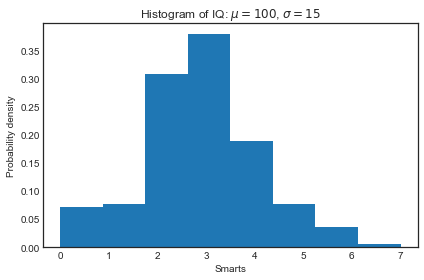

In [47]:
num_bins = 8

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(Rzeros, num_bins, density=1)


ax.set_xlabel('Smarts')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()

fig.savefig('R0s.png')